# <span style="color:red"> Lezione 7 </span>

## <span style="color:green">Esercizio 7.1</span>

In [1]:
# Setting and reading file
import numpy as np
import matplotlib.pyplot as plt
import math

pot_S, pres_S = np.loadtxt("7.1/insta_values_solid.0",\
            usecols=(0,1), delimiter=' ', unpack='true')
pot_L, pres_L = np.loadtxt("7.1/insta_values_liquid.0",\
            usecols=(0,1), delimiter=' ', unpack='true')
pot_G, pres_G = np.loadtxt("7.1/insta_values_gas.0",\
            usecols=(0,1), delimiter=' ', unpack='true')

#### <span style="color:blue">Equilibration</span>

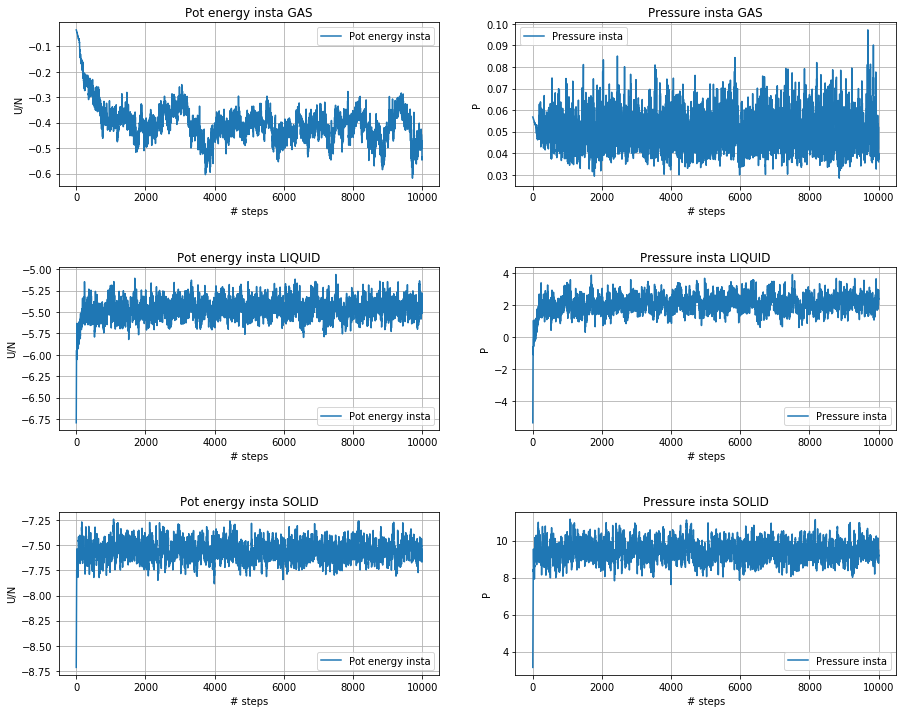

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(15,12),gridspec_kw=dict(wspace=0.2, hspace=0.5))
# subplot
# energy
ax[0,0].plot(pot_G, label='Pot energy insta')
ax[0,0].set_title('Pot energy insta GAS')
ax[0,0].set_xlabel('# steps')
ax[0,0].set_ylabel('U/N')
ax[0,0].legend()
ax[0,0].grid(True)
# pressure 
ax[0,1].plot(pres_G, label='Pressure insta')
ax[0,1].set_title('Pressure insta GAS')
ax[0,1].set_xlabel('# steps')
ax[0,1].set_ylabel('P')
ax[0,1].legend()
ax[0,1].grid(True)
# energy
ax[1,0].plot(pot_L, label='Pot energy insta')
ax[1,0].set_title('Pot energy insta LIQUID')
ax[1,0].set_xlabel('# steps')
ax[1,0].set_ylabel('U/N')
ax[1,0].legend()
ax[1,0].grid(True)
# pressure 
ax[1,1].plot(pres_L, label='Pressure insta')
ax[1,1].set_title('Pressure insta LIQUID')
ax[1,1].set_xlabel('# steps')
ax[1,1].set_ylabel('P')
ax[1,1].legend()
ax[1,1].grid(True)
# energy
ax[2,0].plot(pot_S, label='Pot energy insta')
ax[2,0].set_title('Pot energy insta SOLID')
ax[2,0].set_xlabel('# steps')
ax[2,0].set_ylabel('U/N')
ax[2,0].legend()
ax[2,0].grid(True)
# pressure 
ax[2,1].plot(pres_S, label='Pressure insta')
ax[2,1].set_title('Pressure insta SOLID')
ax[2,1].set_xlabel('# steps')
ax[2,1].set_ylabel('P')
ax[2,1].legend()
ax[2,1].grid(True)

Sono stati plottate l'energia interna e la pressione istantanee e si può chiaramente vedere che il sistema si equilibria dopo:

* GAS ---> 1500 steps MC
* LIQUID ---> 1000 steps MC
* SOLID ---> 750 steps MC

#### <span style="color:blue">Python script of the autocorrelation functions</span>

Per andare a calcolare l'autocorrelazione serve che il sistema sia equilibrato. L'equilibrazione è stata implementata in 7.2 ed è per questo che rileggiamo i file dei valori istantanei.

In [8]:
pot_S, pres_S = np.loadtxt("7.2/data/insta_values_solid.0",\
            usecols=(0,1), delimiter=' ', unpack='true')
pot_L, pres_L = np.loadtxt("7.2/data/insta_values_liquid.0",\
            usecols=(0,1), delimiter=' ', unpack='true')
pot_G, pres_G = np.loadtxt("7.2/data/insta_values_gas.0",\
            usecols=(0,1), delimiter=' ', unpack='true')

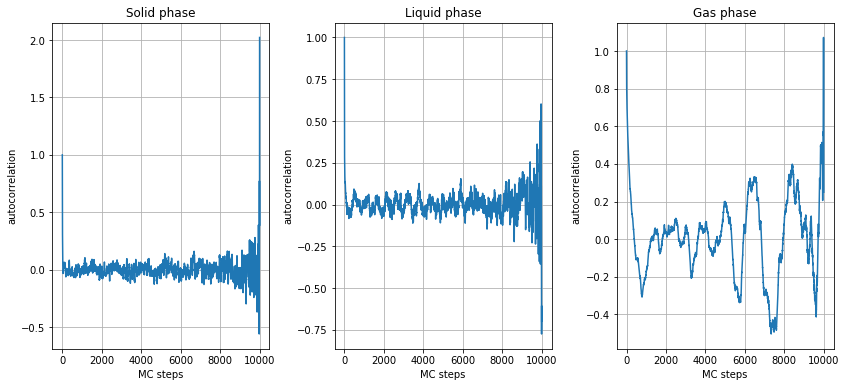

In [12]:
# defining the ac_function and plot ac_function per pot. energy and pressure
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result
# setting 
fig, bx = plt.subplots(nrows=1, ncols=3,figsize=(14,6),gridspec_kw=dict(wspace=0.3, hspace=0.5))
x = np.linspace(0,10000,10001)
# plotting
# SOLID
bx[0].plot(x,estimated_autocorrelation(pot_S))
bx[0].set_xlabel('MC steps')
bx[0].set_ylabel('autocorrelation')
bx[0].grid(True)
# LIQUID
bx[0].set_title("Solid phase")
bx[1].plot(x,estimated_autocorrelation(pot_L))
bx[1].set_xlabel('MC steps')
bx[1].set_ylabel('autocorrelation')
bx[1].set_title("Liquid phase")
bx[1].grid(True)
# GAS
bx[2].plot(x,estimated_autocorrelation(pot_G))
bx[2].set_xlabel('MC steps')
bx[2].set_ylabel('autocorrelation')
bx[2].set_title("Gas phase")
bx[2].grid(True)

Possiamo vedere la funzione di auto correlazione è trascurabile in un range di "larghezza" dei blocchi compresa tra $[1000,5000]$. Ci fermiamo a 5000 in quanto avendo al massimo 10000 MC steps, è la larghezza massima per avere almeno due blocchi.

#### <span style="color:blue">Statistical uncertainties as a function of 𝐿</span>

In [13]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

def stat_uncert_L(x,L):
    N = int((len(x)-1)/L)
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)
    for i in range(N):
        sum = 0
        for j in range(L): 
            k = j+i*L
            sum += x[k]
        ave[i] = sum/L       # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 
    

    for i in range(N): #accumulo i valori medi e quadratici medi
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return err_prog[N-1]

In [14]:
f = np.zeros(4991)
for h in range (10,5000):
    f[h] = stat_uncert_L(pot_S,h-9)
    #g[h] = stat_uncert_L(pres,h)
x = np.linspace(10,5000,4990)
plt.plot(x,f,label='Statistical uncertainties as a function of L for pot. ene.')
plt.plot(x,f,label='Statistical uncertainties as a function of L for pressure')
plt.legend()
plt.grid(True)
plt.show()

IndexError: index 4991 is out of bounds for axis 0 with size 4991

Possiamo vedere che l'incertezza stat. oltre il (200-->solid; 250-->liquid; 500-->gas) step per blocco inizia a saturare attorno a un valore e quindi è inutile prendere blocchi più grandi se il nostro scopo è avere una stima dell'incertezze più precisa.

## <span style="color:green">Esercizio 7.2</span>

#### <span style="color:blue">Average value of g(r) of the block</span>

Ho salvato nei vari file `histogram_state.0` i valori di _Average value of g(r) of the block_ consecutivamente, che poi separo nel script sottostante per andare a graficare poi l'istogramma di ogni blocco. Possiamo notare che gli andamenti dei 10 blocchi hanno andamenti molto simili (statisticamente uguali).

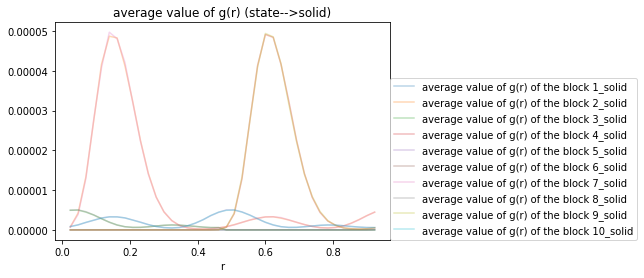

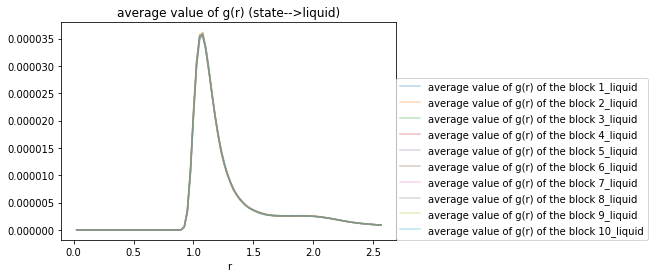

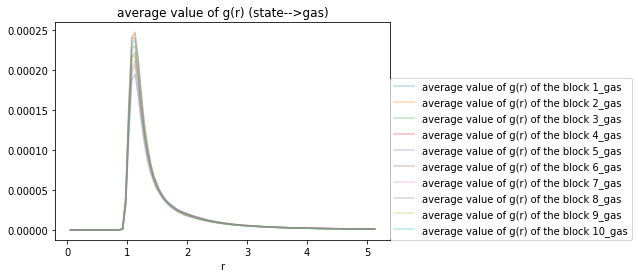

In [5]:
# blocks and state
nblk = 10
num_blk = ["1","2","3","4","5","6","7","8","9","10"]
state = ["solid","liquid","gas"]

for h in range(3):
    r, hist = np.loadtxt("7.2/data/histogram_"+state[h]+".0",\
                usecols=(0,1), delimiter=' ', unpack='true')
    N = int(len(hist)/nblk)
    # saving r
    Radius = np.zeros(N)
    for i in range(N):
        Radius[i] = r[i]
    # saving the 100 values of hist's bins
    for i in range(nblk):
        p = np.zeros(N)
        for j in range(N):
            p[j] = hist[i*N+j]
        plt.plot(Radius,p,alpha=0.3,label='average value of g(r) of the block '+num_blk[i]+"_"+state[h])
        plt.title('average value of g(r) (state-->'+state[h]+')')
        plt.xlabel('r')
        plt.legend(loc=(1.,0.))
    plt.show()

#### <span style="color:blue">Final average value of g(r) with statistical uncertainties</span>

Ho per ogni bin 10 blocchi quindi posso considerare come ogni bin una stima di g(r) con r fissato. Posso così procedere all'accumulazione e calcolo dell'incertezza (10 misure con incertezza per ogni bin). Prendo poi il decimo valore e lo uso per avere _Final average value of g(r) with statistical uncertainties_. Questo procedimento lo faccio con c++. Quindi quello è riportato è l'ultimo valore con errore della somma progressiva di 10 blocchi da 1000 steps. Dal grafico non risultando questi errori in quanto sono molto piccoli (come ci si aspettava).

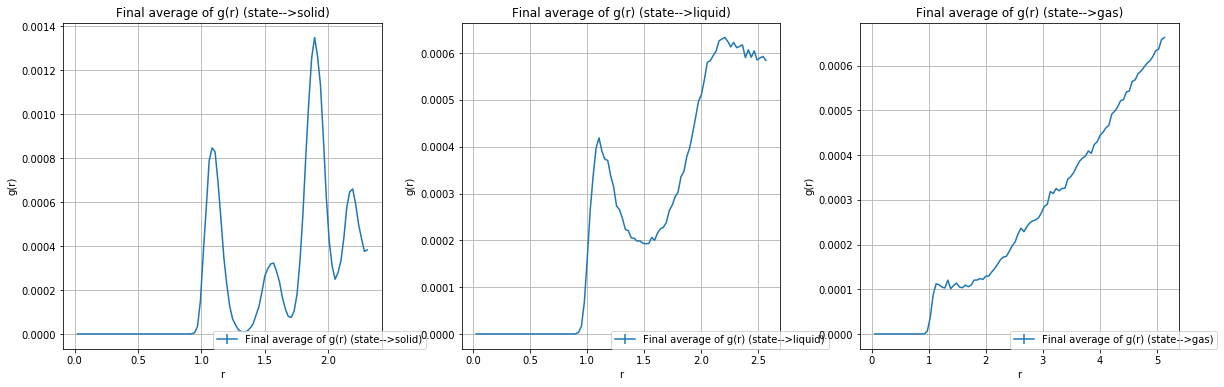

In [8]:
# blocks and state
nblk = 10
state = ["solid","liquid","gas"]
# set
fig, bx = plt.subplots(nrows=1, ncols=3,figsize=(20,6),gridspec_kw=dict(wspace=0.25, hspace=0.5))
# reading and plottinghist[i] = (double)rho*npart*deltaV;
for i in range(3):
    r, hist, err = np.loadtxt("7.2/data/final_hist_"+state[i]+".0",\
                usecols=(0,1,2), delimiter=' ', unpack='true')
    bx[i].errorbar(r,hist,yerr=err,label='Final average of g(r) (state-->'+state[i]+')')
    bx[i].set_title('Final average of g(r) (state-->'+state[i]+')')
    bx[i].set_xlabel('r')
    bx[i].set_ylabel('g(r)')
    bx[i].legend(loc=(0.47,0.))
    bx[i].grid(True)
    